In [1]:
# Import all the functions you need
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
from pathlib import Path
import os

# Comment here to add in for either mac or linux computer
# sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/NeuroPy'])  # For mac laptop
sys.path.extend(['/data/GitHub/NeuroPy'])  # for linux

from neuropy import core
from neuropy.io import (optitrackio,
                        dlcio,
                        )
from neuropy.io.neuroscopeio import NeuroscopeIO
from neuropy.io.binarysignalio import BinarysignalIO 
from neuropy.io.miniscopeio import MiniscopeIO
from neuropy.utils.signal_process import plot_miniscope_noise

## After denoising

<IPython.core.display.Javascript object>


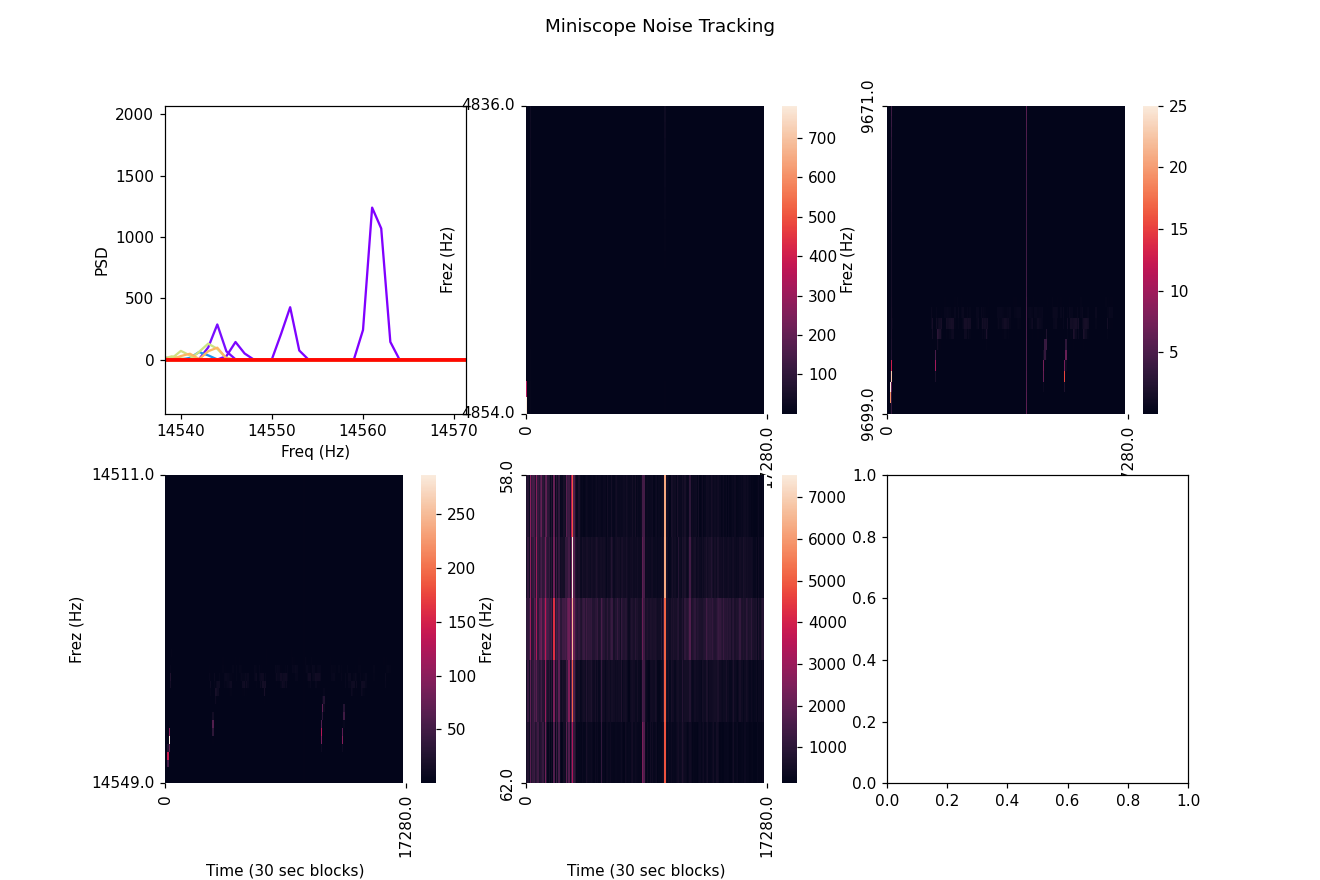

In [2]:
%matplotlib notebook
datfile = BinarysignalIO(Path(os.getcwd()) / 'Finn_alternation2_denoised.dat',
                         n_channels=35, sampling_rate=30000)

signal = datfile.get_signal()
f_full, Pxx_full = plot_miniscope_noise(signal, 23, interval_sec=90, remove_disconnects=True)

A bit noisy at the beginning - remove bump at 4853 and at 14553 and 14562

In [6]:
sys.path.extend(['/data/GitHub/spyking-circus/'])  # for linux
from circus.filtering import miniscope_filter
dat_file = str(Path(os.getcwd()) / 'Finn_alternation2_denoised.dat')

notch_filter = [
            {"w0": 4853.0, "bw": 20, "Q": None},
            {"w0": 14553, "bw": 20, "Q": None},
            {"w0": 14562, "bw": 20, "Q": None},
        ]
miniscope_filter(dat_file, top_limit=0, notch_filter=notch_filter)

STARTING MINISCOPE DE-NOISING
padding_sec changed to 1 for notch filter
Filtering with a notch filter (w0=4853.0 and Q=243.0)


100%|████████████████████████████████████|[26:51<00:00,  2.78s/it]


padding_sec changed to 1 for notch filter
Filtering with a notch filter (w0=14553.0 and Q=728.0)


100%|████████████████████████████████████|[24:15<00:00,  2.51s/it]


padding_sec changed to 1 for notch filter
Filtering with a notch filter (w0=14562.0 and Q=728.0)


100%|████████████████████████████████████|[24:18<00:00,  2.52s/it]


DAT FILE DE-NOISING FINISHED


<IPython.core.display.Javascript object>


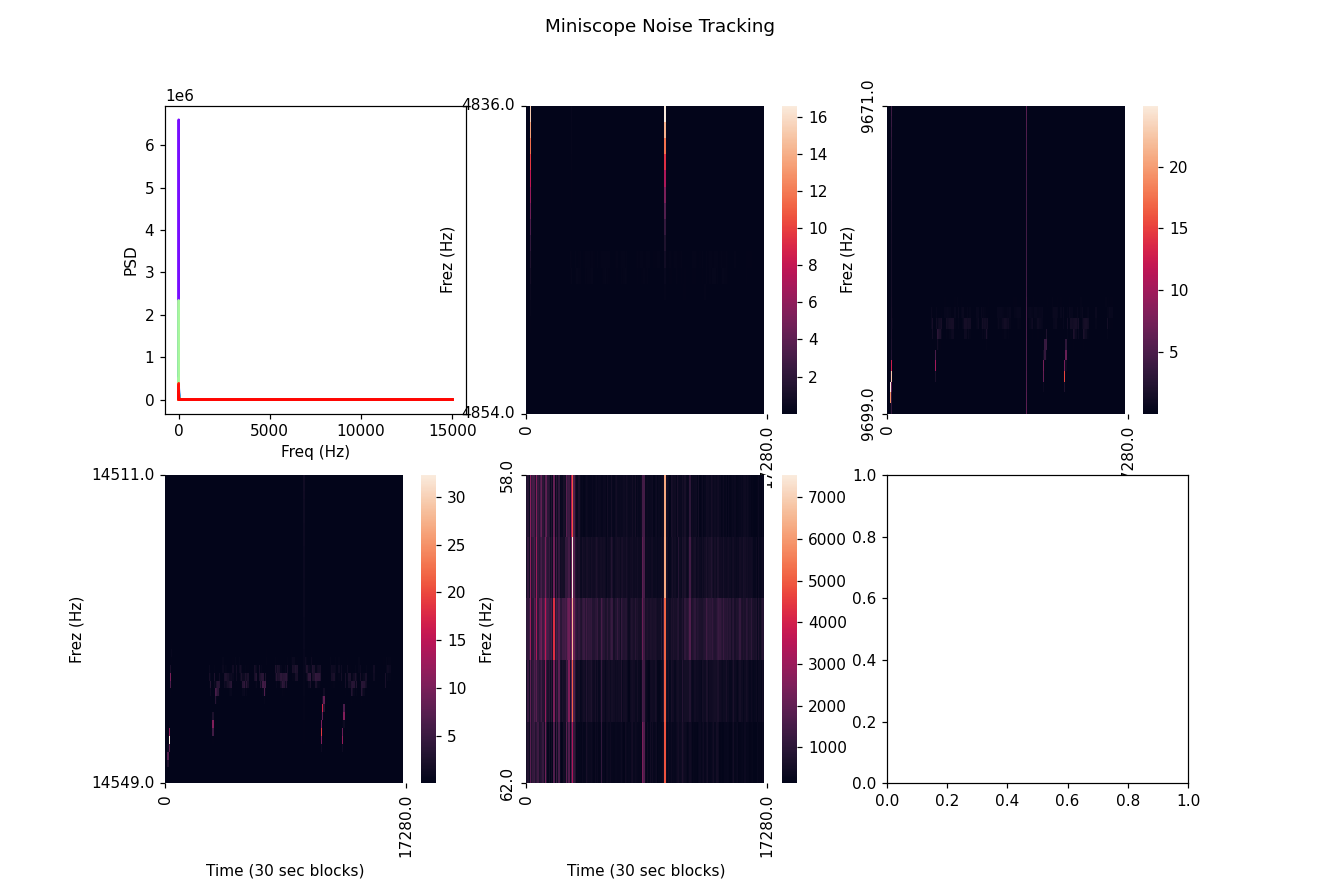

In [7]:
%matplotlib notebook
datfile = BinarysignalIO(Path(os.getcwd()) / 'Finn_alternation2_denoised.dat',
                         n_channels=35, sampling_rate=30000)

signal = datfile.get_signal()
f_full, Pxx_full = plot_miniscope_noise(signal, 23, interval_sec=90, remove_disconnects=True)

Looks great!